# AI Explainability evaluations

In [1]:
# general tools
import os
import sys
import time
import h5py
import numpy as np
from glob import glob

In [2]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

import matplotlib.gridspec as gridspec

%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import verif_utils as vu
import graph_utils as gu

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

### Latent space visualizations

In [5]:
latent_info = np.load(result_dir+'XAI_verif_new.npy', allow_pickle=True)[()]

In [6]:
def legend_format(LG):
    LG.get_frame().set_facecolor('none')
    LG.get_frame().set_linewidth(0)
    LG.get_frame().set_alpha(1.0)

In [7]:
colors = {}
colors['GEFS'] = blue
colors['MEAN'] = blue
colors['ViT'] = 0.7*orange
colors['LDM'] = red
colors['CCPA'] = 'w'

In [8]:
# XLIMs = [[0, 10], 
#          [0, 11], 
#          [0, 13]]*2

# XLABELs = [[1, 3, 5, 7, 9], 
#            [1.5, 3.5, 5.5, 7.5, 9.5], 
#            [1.5, 3.5, 5.5, 7.5, 9.5, 11.5]]*2

# YLIMs = [[-6.5, -5.0],
#          [-7.0, -3.0], 
#          [-7.0, -4.0]]*2

# YLABELs = [[-6.3, -5.9, -5.5, -5.1], 
#            [-6.5, -5.5, -4.5, -3.5], 
#            [-6.5, -5.8, -5.1, -4.4]]*2

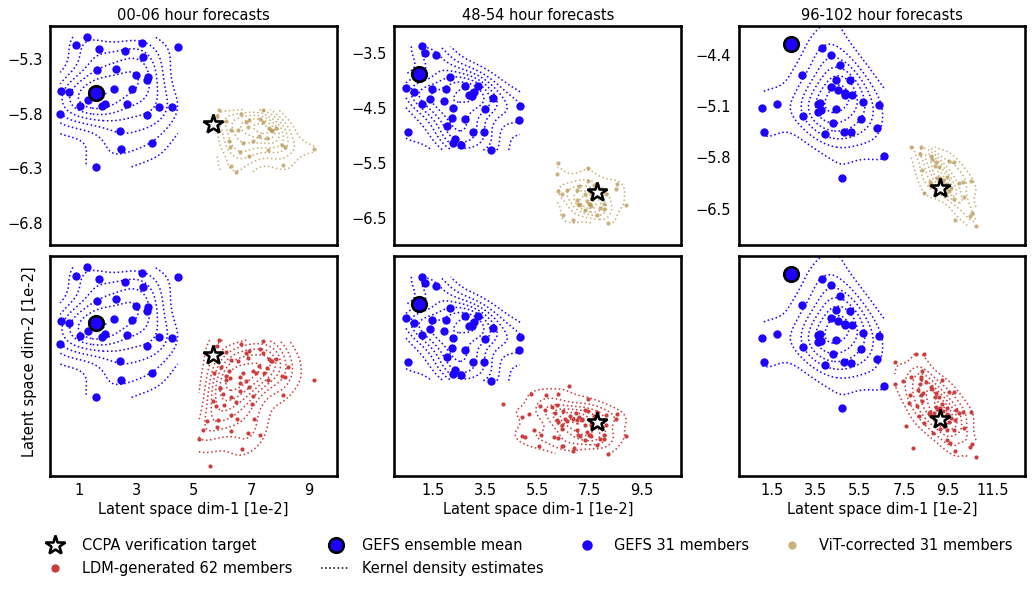

In [9]:
LEADs_plot = [0, 8, 16]
titles = ['00-06 hour forecasts', '48-54 hour forecasts', '96-102 hour forecasts']
scale = 1e2

fig = plt.figure(figsize=(13, 6), dpi=dpi_)

# ----------------------------------------------------------------- #
# axis arrangments
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[1, 1, 1])

AX = []
for i in range(2):
    for j in range(3):
        AX.append(plt.subplot(gs[i, j]))
N_row = 2
N_col = 3

plt.subplots_adjust(0, 0, 1, 1, hspace=0.05, wspace=0.2)

XLIMs = [[0, 10], 
         [0, 11], 
         [0, 13]]*2

XLABELs = [[1, 3, 5, 7, 9], 
           [1.5, 3.5, 5.5, 7.5, 9.5], 
           [1.5, 3.5, 5.5, 7.5, 9.5, 11.5]]*2

YLIMs = [[-7.0, -5.0],
         [-7.0, -3.0], 
         [-7.0, -4.0]]*2

YLABELs = [[-6.8, -6.3, -5.8, -5.3], 
           [-6.5, -5.5, -4.5, -3.5], 
           [-6.5, -5.8, -5.1, -4.4]]*2


for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    if i > 2:
        ax.tick_params(labelbottom=True)
        ax.set_xlabel('Latent space dim-1 [1e-2]', fontsize=14)
    else:
        ax.set_title(titles[i], fontsize=14)
        ax.tick_params(axis="both", which="both", labelleft=True)
        
    ax.set_xlim(XLIMs[i])
    ax.set_xticks(XLABELs[i])
    ax.set_ylim(YLIMs[i])
    ax.set_yticks(YLABELs[i])

AX[3].text(-0.1, 0.1, 'Latent space dim-2 [1e-2]', rotation=90, fontsize=14, transform=AX[3].transAxes)

for icol, ilead in enumerate(LEADs_plot):
    # ---------------------------- #
    # top panel
    
    ax = AX[icol]
    for key in ['GEFS', 'ViT']:
        ax.contour(scale*latent_info['{}_KDE_{}'.format(key, ilead)][0],
                   scale*latent_info['{}_KDE_{}'.format(key, ilead)][1],
                   latent_info['{}_KDE_{}'.format(key, ilead)][2],
                   colors=(colors[key],), linewidths=(1.5,), linestyles=(':',))
        
    key = 'GEFS'
    ax.plot(scale*latent_info['{}_coords_{}'.format(key, ilead)][0], 
            scale*latent_info['{}_coords_{}'.format(key, ilead)][1],
            marker='o', mec='k', mew=0, ms=8, mfc=colors[key], linewidth=0)
    key = 'ViT'
    ax.plot(scale*latent_info['{}_coords_{}'.format(key, ilead)][0], 
            scale*latent_info['{}_coords_{}'.format(key, ilead)][1],
            marker='o', mec='k', mew=0, ms=4, mfc=colors[key], linewidth=0)

    
    ax.plot(scale*latent_info['MEAN_coords_{}'.format(ilead)][0], 
            scale*latent_info['MEAN_coords_{}'.format(ilead)][1],
            marker='o', mec='k', mew=2.5, ms=14, mfc=colors['MEAN'], linewidth=0)
    
    ax.plot(scale*latent_info['CCPA_coords_{}'.format(ilead)][0], 
            scale*latent_info['CCPA_coords_{}'.format(ilead)][1],
            marker='*', mec='k', mew=2.5, ms=20, mfc=colors['CCPA'], linewidth=0)
    
    # ---------------------------- #
    # # bottom panel
    
    ax = AX[N_col*1+icol]
    
    for key in ['GEFS', 'LDM']:
        ax.contour(scale*latent_info['{}_KDE_{}'.format(key, ilead)][0],
                   scale*latent_info['{}_KDE_{}'.format(key, ilead)][1],
                   latent_info['{}_KDE_{}'.format(key, ilead)][2],
                   colors=(colors[key],), linewidths=(1.5,), linestyles=(':',))
    key = 'GEFS'
    ax.plot(scale*latent_info['{}_coords_{}'.format(key, ilead)][0], 
            scale*latent_info['{}_coords_{}'.format(key, ilead)][1],
            marker='o', mec='k', mew=0, ms=8, mfc=colors[key], linewidth=0)
    key = 'LDM'
    ax.plot(scale*latent_info['{}_coords_{}'.format(key, ilead)][0], 
            scale*latent_info['{}_coords_{}'.format(key, ilead)][1],
            marker='o', mec='k', mew=0, ms=4, mfc=colors[key], linewidth=0)
    
    ax.plot(scale*latent_info['MEAN_coords_{}'.format(ilead)][0], 
            scale*latent_info['MEAN_coords_{}'.format(ilead)][1],
            marker='o', mec='k', mew=2.5, ms=14, mfc=colors['MEAN'], linewidth=0)
    
    ax.plot(scale*latent_info['CCPA_coords_{}'.format(ilead)][0], 
            scale*latent_info['CCPA_coords_{}'.format(ilead)][1],
            marker='*', mec='k', mew=2.5, ms=20, mfc=colors['CCPA'], linewidth=0)


handle_lg = []
handle_lg.append(mlines.Line2D([], [], label='CCPA verification target', 
                               marker='*', mec='k', mew=2.5, ms=20, mfc=colors['CCPA'], linewidth=0))
handle_lg.append(mlines.Line2D([], [], label='LDM-generated 62 members', 
                               marker='o', mec='k', mew=0, ms=8, mfc=colors['LDM'], linewidth=0))
handle_lg.append(mlines.Line2D([], [], label='GEFS ensemble mean', 
                               marker='o', mec='k', mew=2.5, ms=14, mfc=colors['MEAN'], linewidth=0))
handle_lg.append(mlines.Line2D([], [], label='Kernel density estimates', 
                               color='k', linewidth=1.5, linestyle=':'))
handle_lg.append(mlines.Line2D([], [], label='GEFS 31 members', 
                               marker='o', mec='k', mew=0, ms=10, mfc=colors['GEFS'], linewidth=0))
handle_lg.append(mlines.Line2D([], [], label='ViT-corrected 31 members', 
                               marker='o', mec='k', mew=0, ms=8, mfc=colors['ViT'], linewidth=0))
# ax_lg1 = fig.add_axes([0.275, -0.15-0.08, 0.725, 0.12])
# LG1 = ax_lg1.legend(handles=handle_lg, bbox_to_anchor=(1, 1), ncol=3, 
#                     prop={'size':14}, fancybox=False); legend_format(LG1)
# ax_lg1.set_axis_off()

ax_lg1 = fig.add_axes([0.0, -0.15-0.08, 1, 0.12])
LG1 = ax_lg1.legend(handles=handle_lg, bbox_to_anchor=(1, 1), ncol=4, 
                    prop={'size':14}, fancybox=False); legend_format(LG1)
ax_lg1.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'fig_latent_space_vis.png', format='png', **fig_keys)